/var/folders/pl/4nhx3_gd3b37181k1rq83g280000gn/T/ipykernel_78650/43971298.py:10: DtypeWarning: Columns (0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, sep='\s+', skiprows=0, header=0)


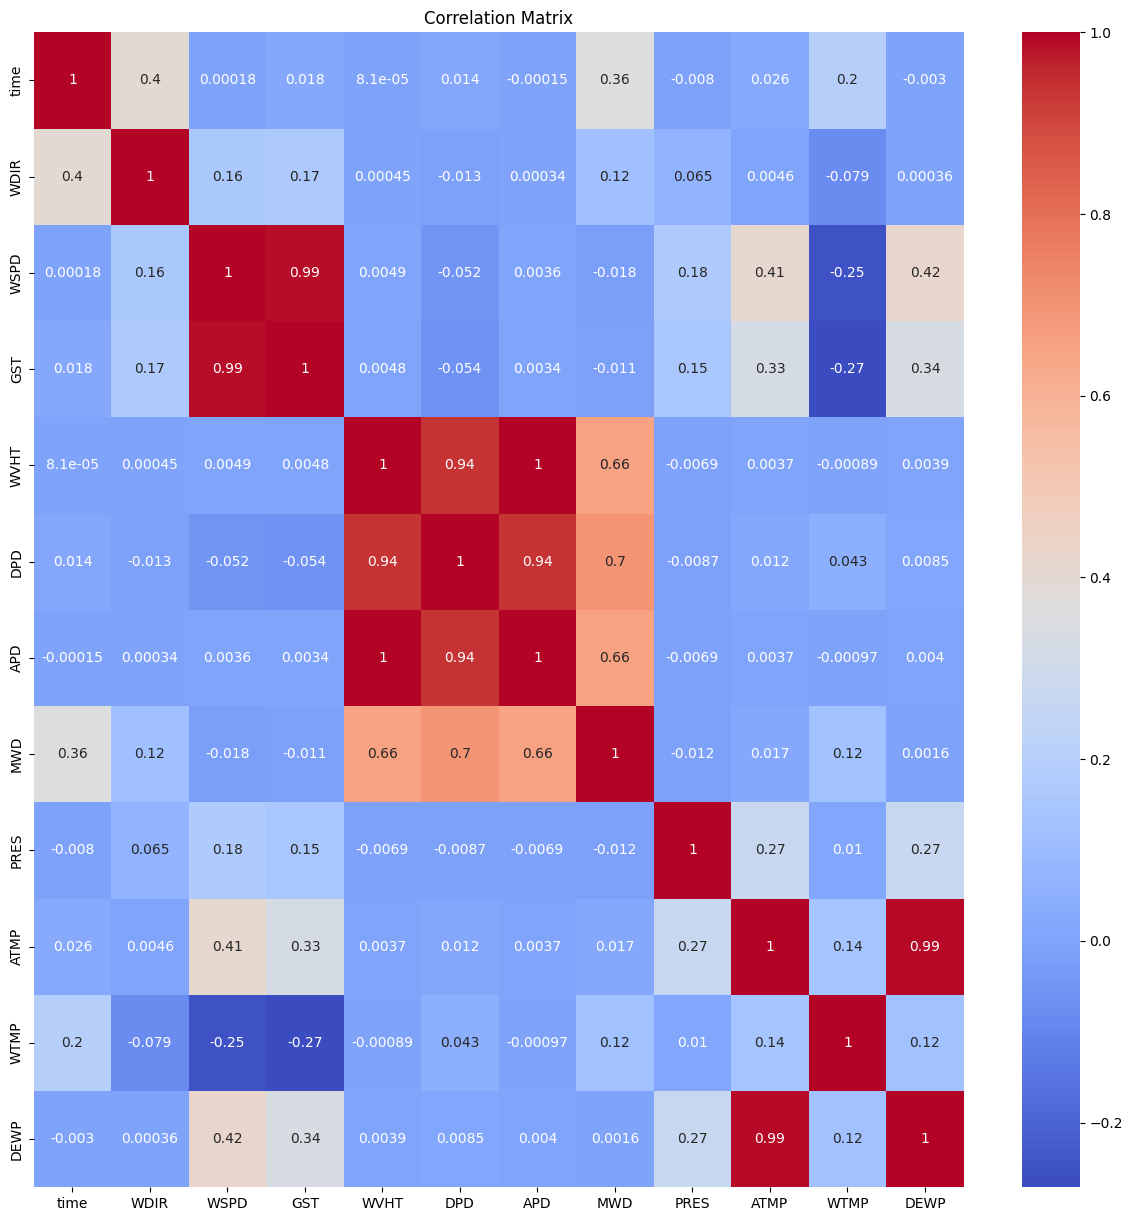

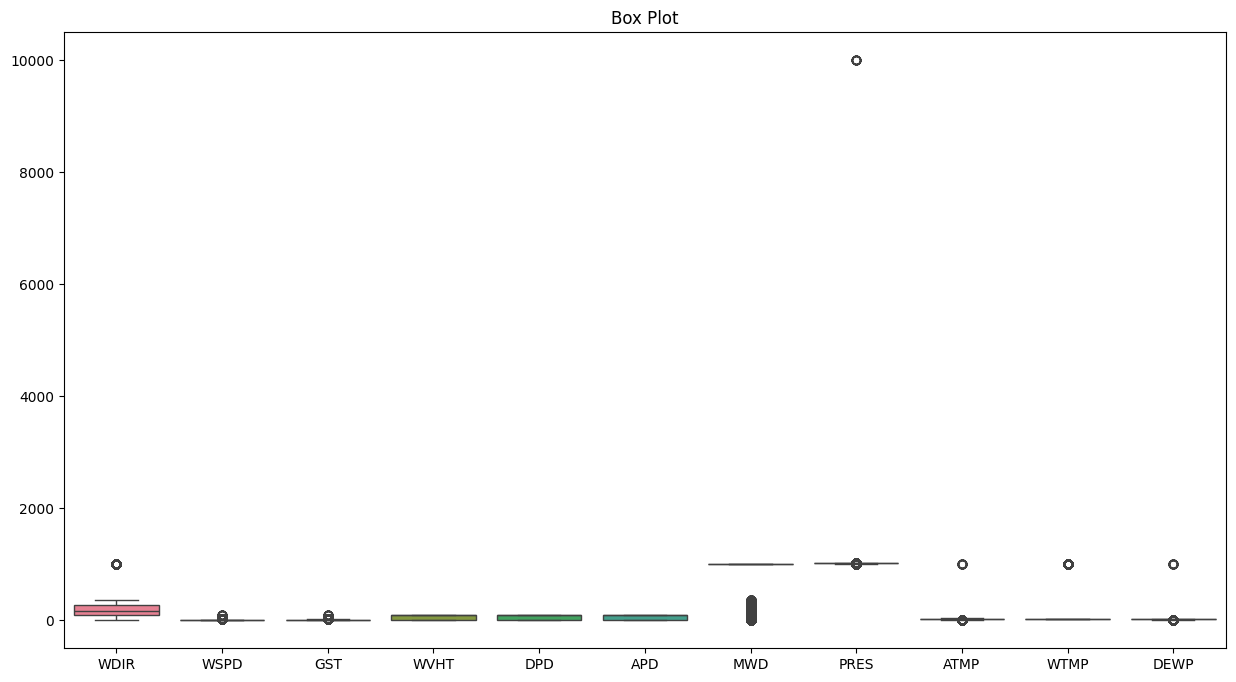

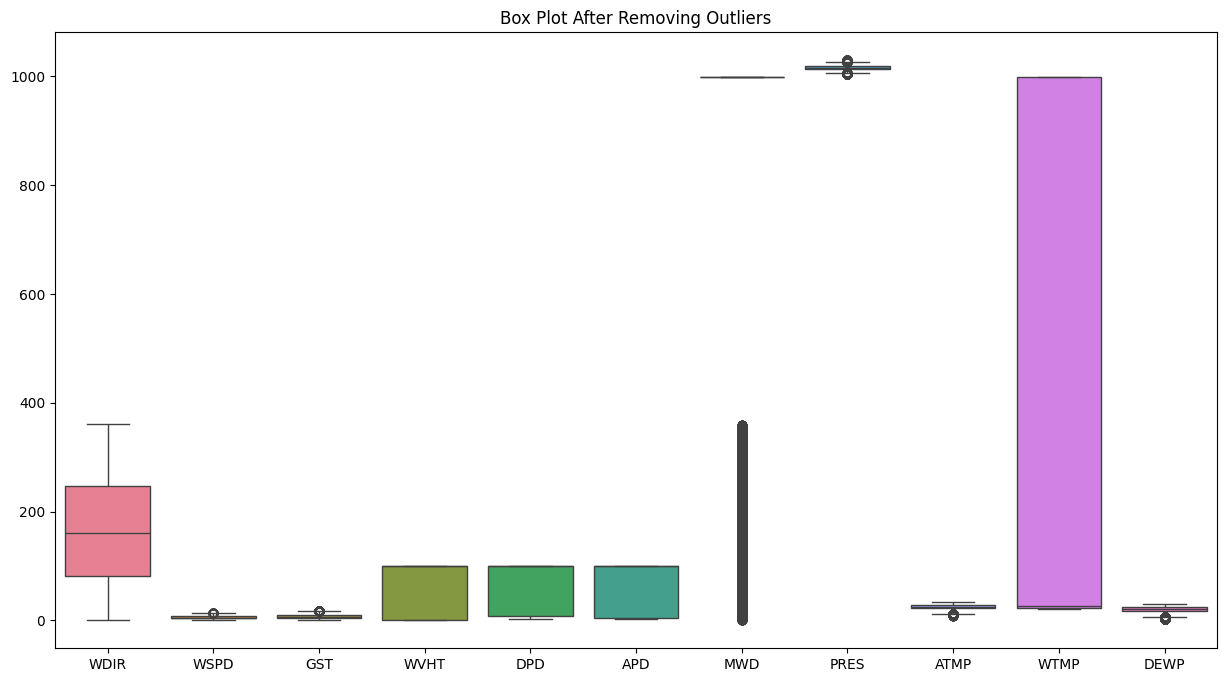

Text(0.5, 1.0, 'Correlation Matrix After Removing Outliers')

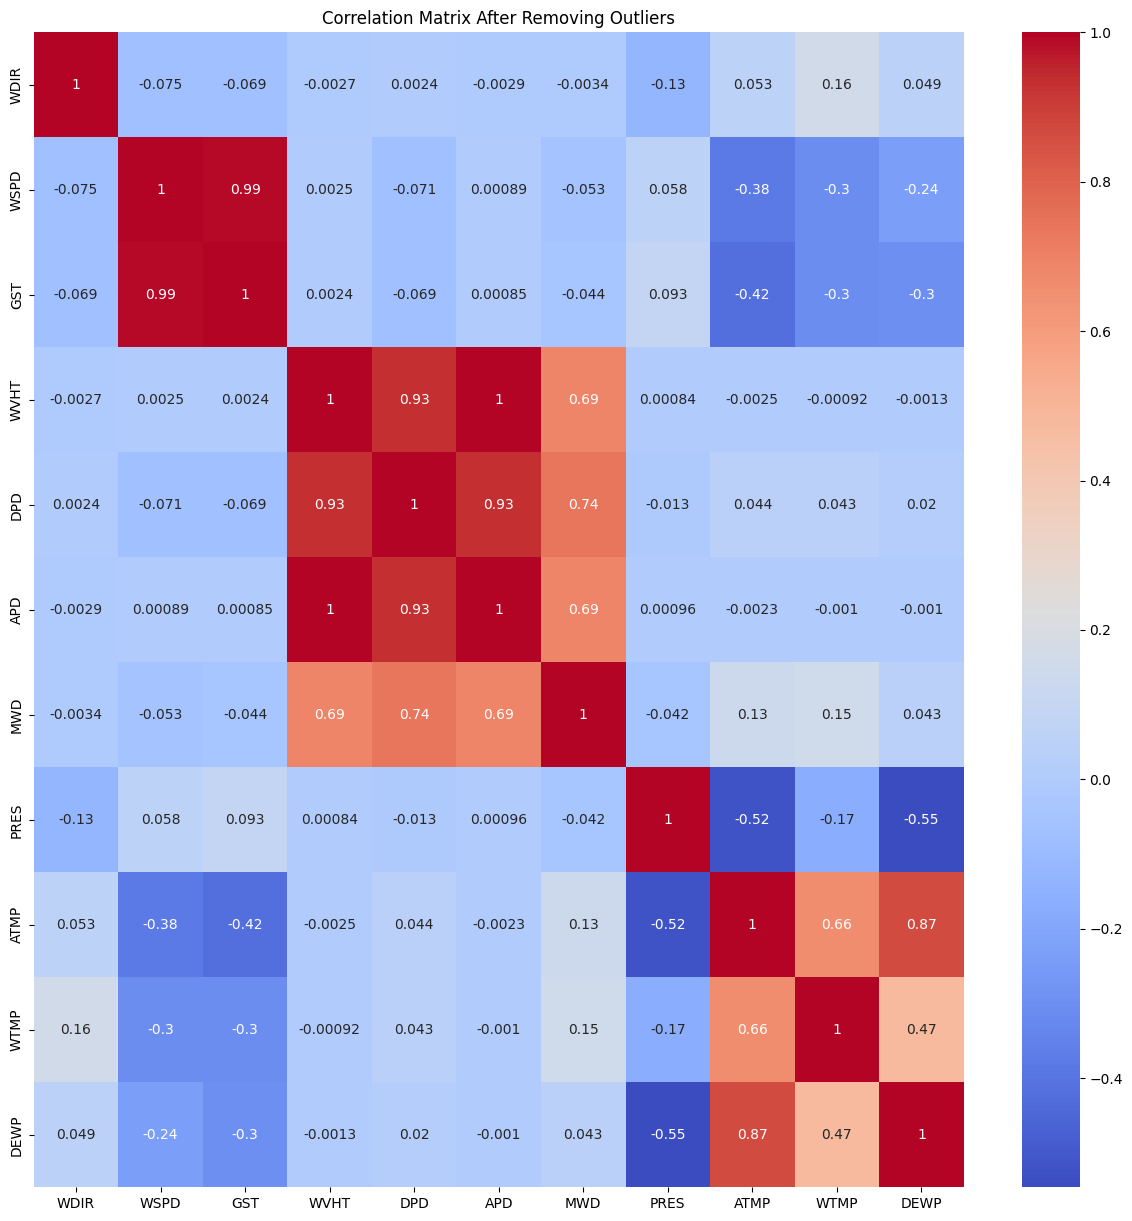

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Define file path
file_path = 'wind_data/2023.txt'

# Read data, skipping the first two comment lines
df = pd.read_csv(file_path, sep='\s+', skiprows=0, header=0)

# Delete the second row in df (i.e., the row with index 1)
df = df.drop(df.index[0])

# Convert the time columns to datetime format
df['time'] = pd.to_datetime(df[['#YY', 'MM', 'DD']].astype(str).apply('-'.join, axis=1))

# Convert all columns to float type
df = df.apply(pd.to_numeric, errors='coerce')

# Specify columns to convert to float type and handle invalid values
columns_to_convert = ['time','WDIR', 'WSPD', 'GST', 'WVHT', 'DPD', 'APD', 'MWD', 'PRES', 'ATMP', 'WTMP', 'DEWP']

# Calculate the correlation matrix for each column
correlation_matrix = df[columns_to_convert].corr()
plt.figure(figsize=(15, 15))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Remove columns except for wind direction (WDIR), average wind speed (WSPD), maximum gust speed (GST), wave height (WVHT), dominant period (DPD), average period (APD), main wind direction (MWD), pressure (PRES), air temperature (ATMP), and water temperature (WTMP)
df = df[columns_to_convert]

# da_ontime is df with the time column removed
da_ontime = df.drop('time', axis=1)
plt.figure(figsize=(15, 8))
sns.boxplot(data=da_ontime)
plt.title('Box Plot')
plt.show()

# Remove outliers using the 3-sigma rule
def remove_outliers(df, column, threshold=3):
    mean = df[column].mean()
    std = df[column].std()
    lower_bound = mean - threshold * std
    upper_bound = mean + threshold * std
    return df[(df[column] > lower_bound) & (df[column] < upper_bound)]

for col in da_ontime.columns:
    da_ontime = remove_outliers(da_ontime, col)

# Visualize each metric in df after removing outliers
plt.figure(figsize=(15, 8))
sns.boxplot(data=da_ontime)
plt.title('Box Plot After Removing Outliers')
plt.show()

# Recalculate the correlation matrix after removing outliers
correlation_matrix = da_ontime.corr()
plt.figure(figsize=(15, 15))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix After Removing Outliers')





In [ ]:
# Display the wave height column with an interactive line chart; the x-axis is time, and the y-axis is wave height
# Convert time to a timestamp format
df['time'] = pd.to_datetime(df['time'])
plt.figure(figsize=(15, 5))
sns.lineplot(data=df, x='time', y='WVHT')
plt.title('Wave Height Over Time')
plt.show()

# Perform data visualization on the columns 'WDIR', 'WSPD', 'GST', 'WVHT', 'DPD', 'APD', 'MWD', 'PRES', 'ATMP', 'WTMP', 'DEWP'


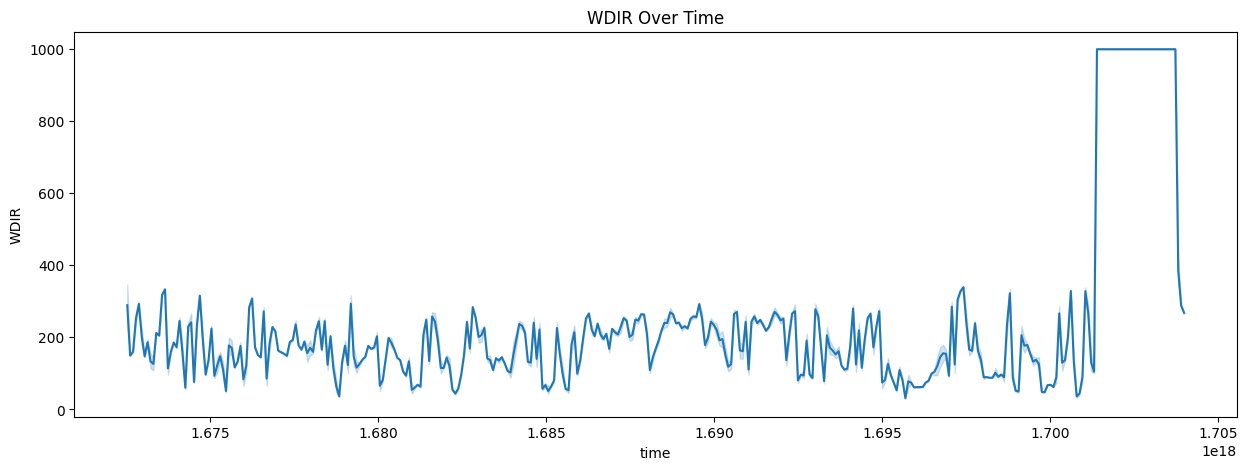

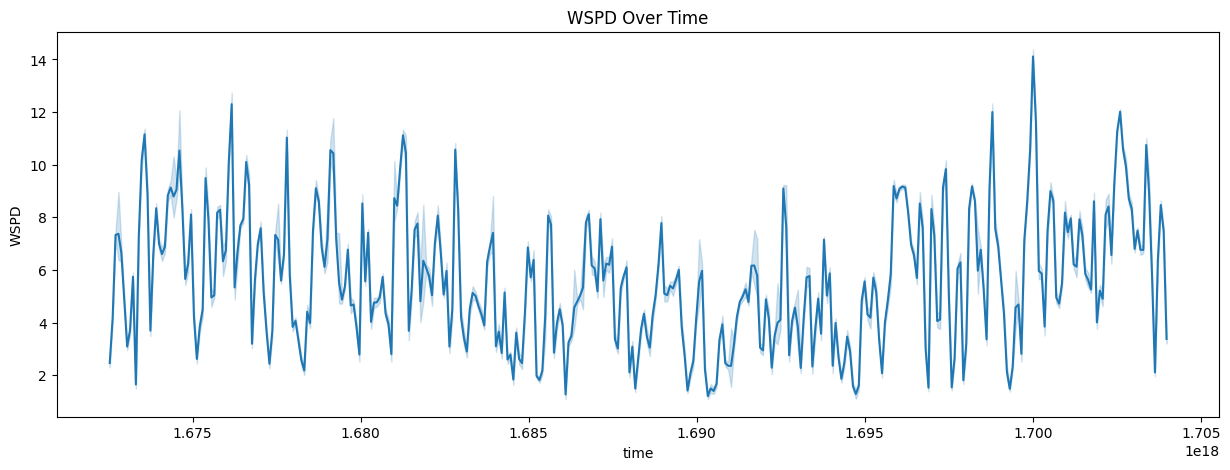

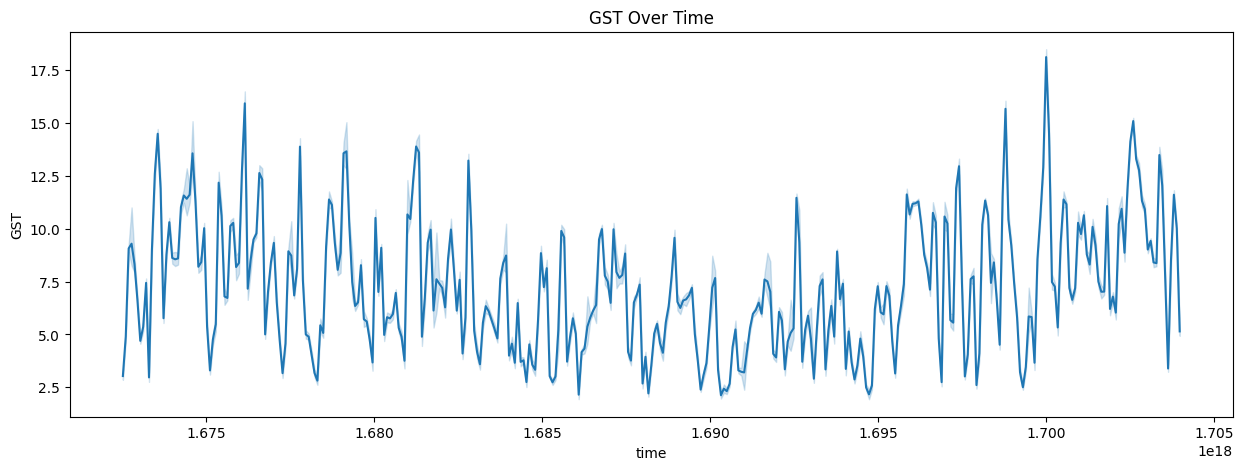

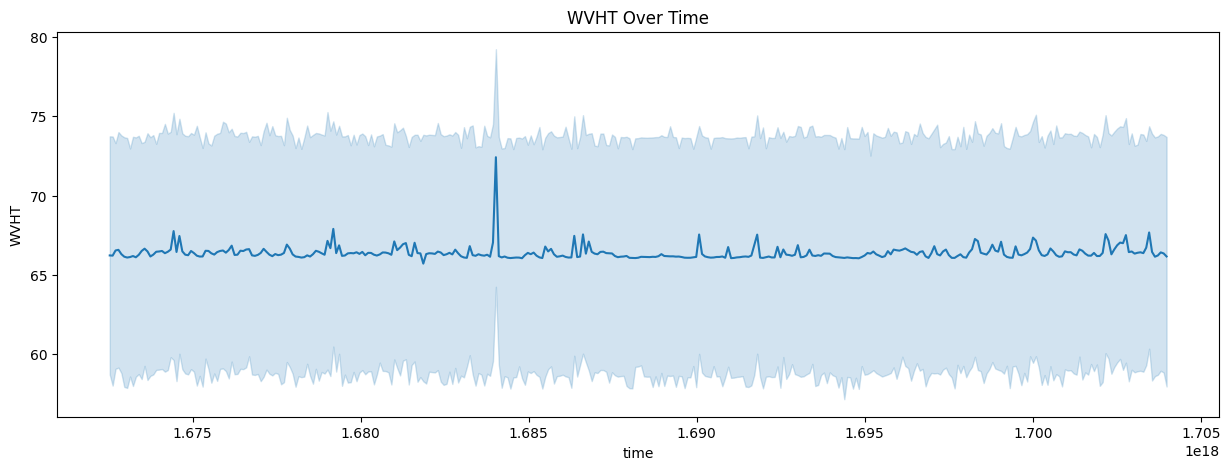

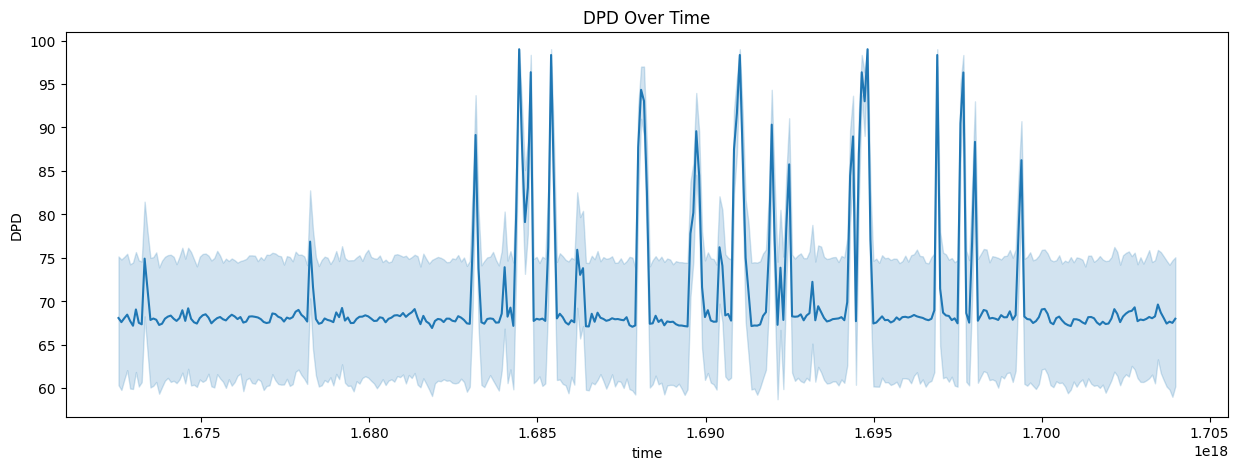

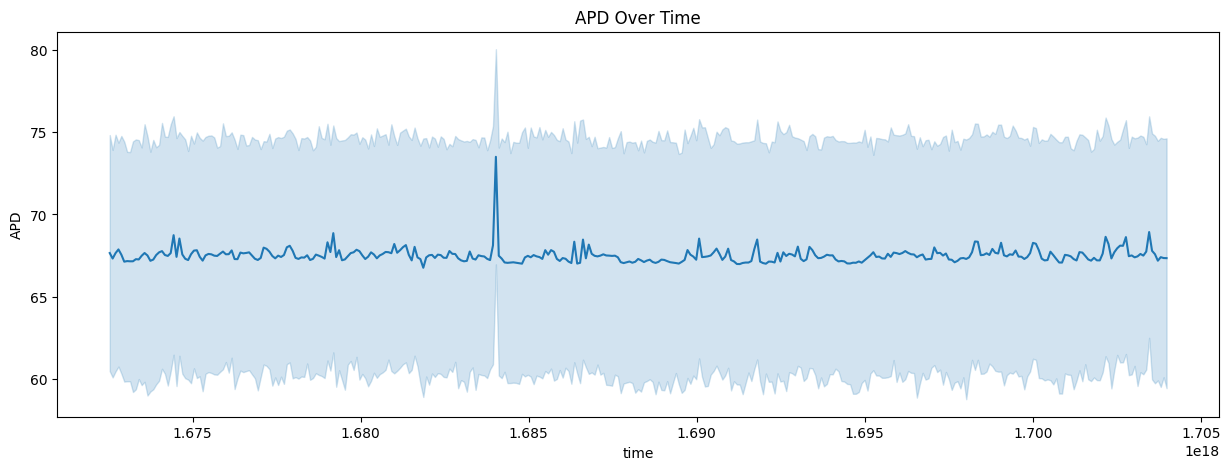

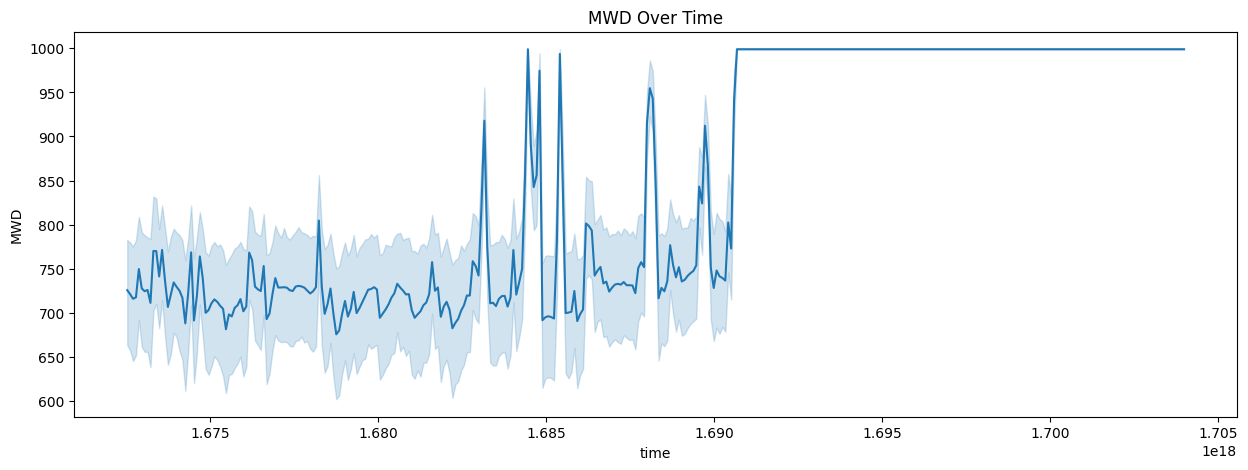

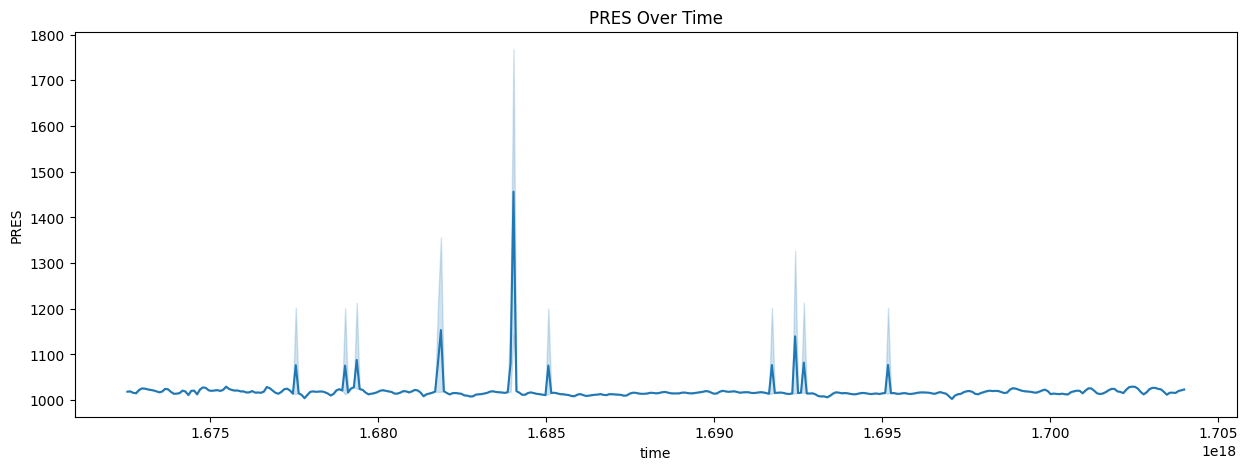

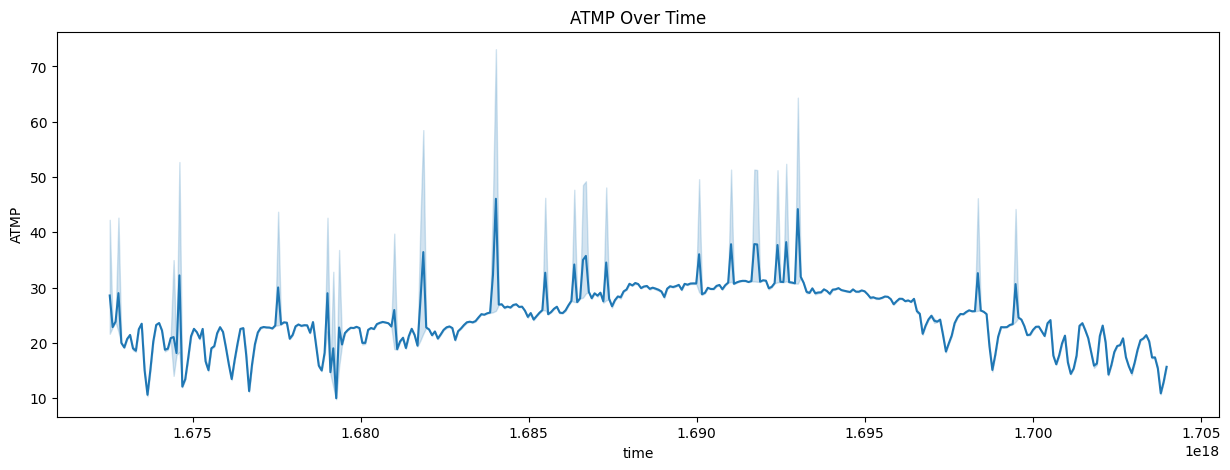

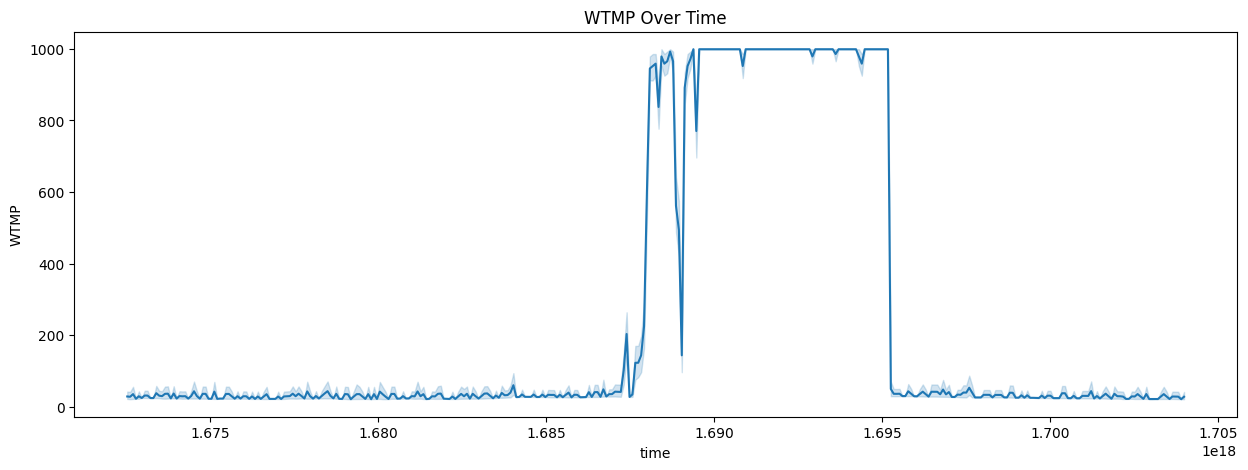

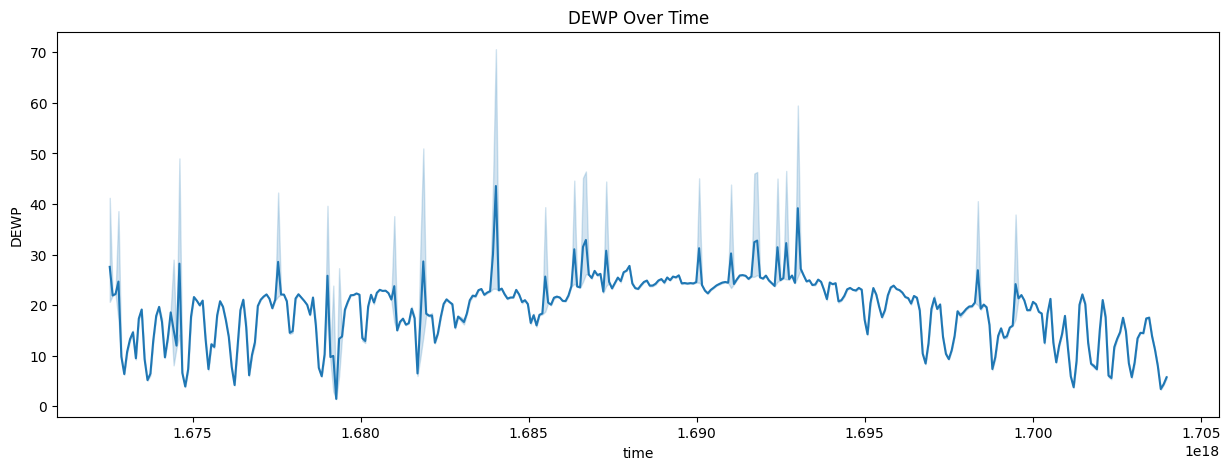

In [3]:
# Perform data visualization for the columns 'WDIR', 'WSPD', 'GST', 'WVHT', 'DPD', 'APD', 'MWD', 'PRES', 'ATMP', 'WTMP', 'DEWP'
for col in ['WDIR', 'WSPD', 'GST', 'WVHT', 'DPD', 'APD', 'MWD', 'PRES', 'ATMP', 'WTMP', 'DEWP']:
    plt.figure(figsize=(15, 5))
    sns.lineplot(data=df, x='time', y=col)
    plt.title(f'{col} Over Time')
    plt.show()


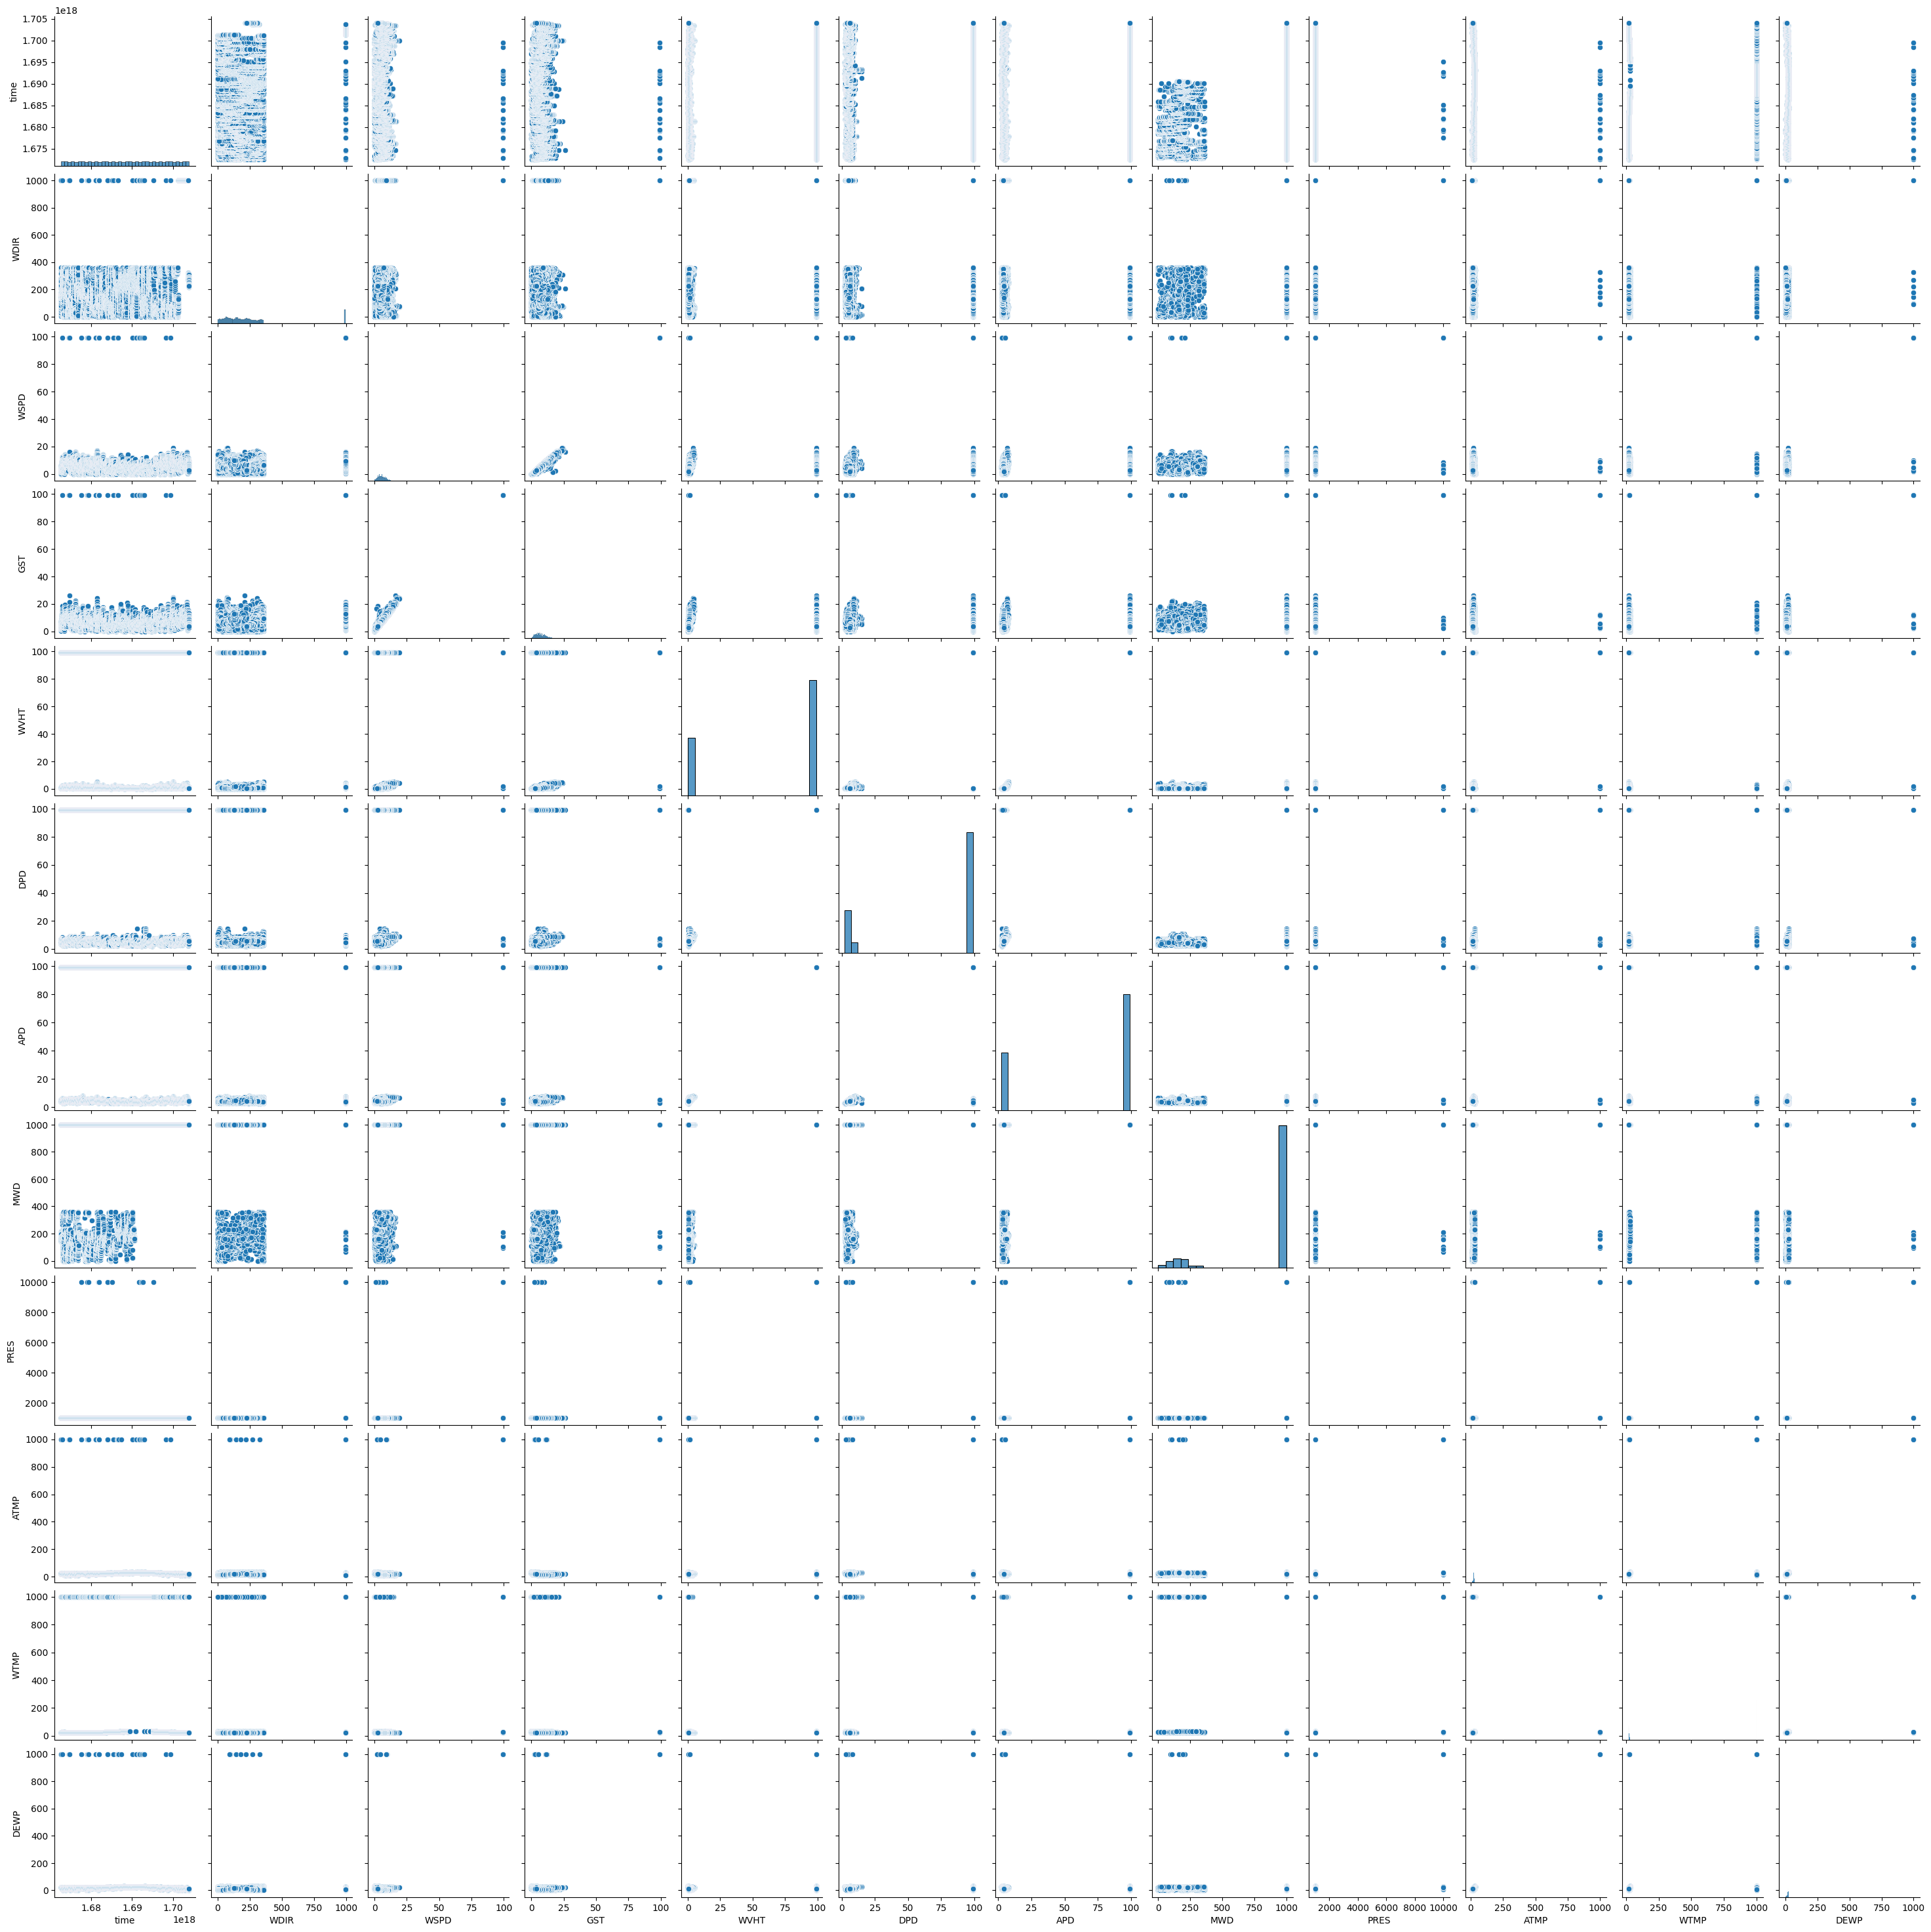

In [4]:
# Study the relationship between wave height (WVHT) and other variables using multiple linear regression
df.corr()  # Calculate the correlation matrix
sns.pairplot(df)  # Plot pairwise relationships between variables
plt.show()

Model coefficients: [ 1.24867034e-04  6.22953758e-02 -2.56387520e-02 -7.93630248e-04
  1.03557317e+00  6.70419148e-05 -4.46014581e-04  1.56621157e-02
  2.65817156e-05 -1.24772118e-02]
Model intercept: -3.3868442263107
Mean Squared Error: 0.09983868755979709


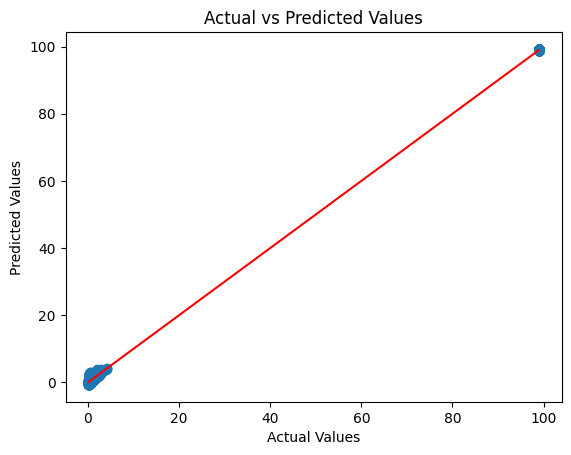

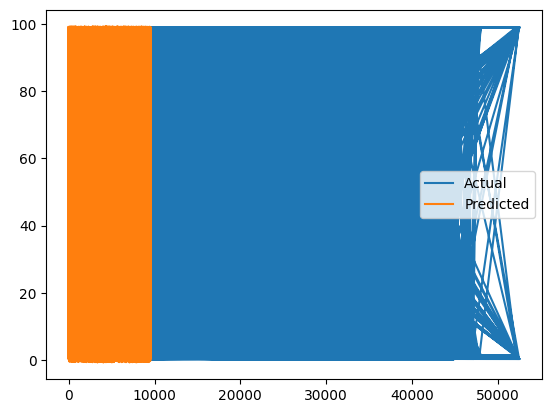

Mean Squared Error: 0.09983868755979709


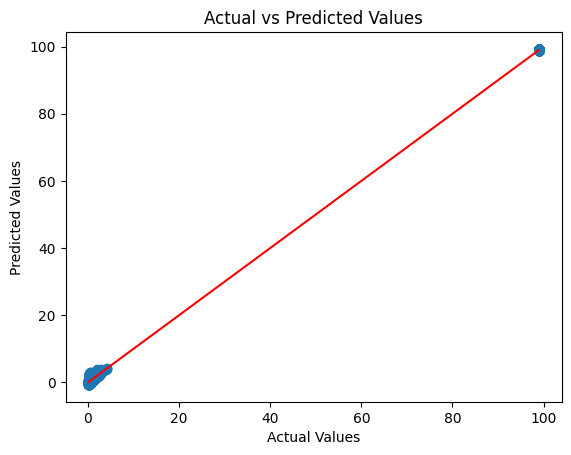

In [8]:
# Build a linear regression model with wave height (WVHT) as the dependent variable, and the remaining variables as inputs
X = da_ontime.drop('WVHT', axis=1)
y = da_ontime['WVHT']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)
print('Model coefficients:', model.coef_)
print('Model intercept:', model.intercept_)
y_pred = model.predict(X_test)
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Values')
# Plot a diagonal reference line
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.show()
# Display actual and predicted values with a line plot
plt.plot(y_test, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.legend()
plt.show()
# Build a Random Forest model
from sklearn.ensemble import RandomForestRegressor
modelt = RandomForestRegressor(n_estimators=100, random_state=42)
modelt.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Values')
# Plot a diagonal reference line
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')

plt.show()


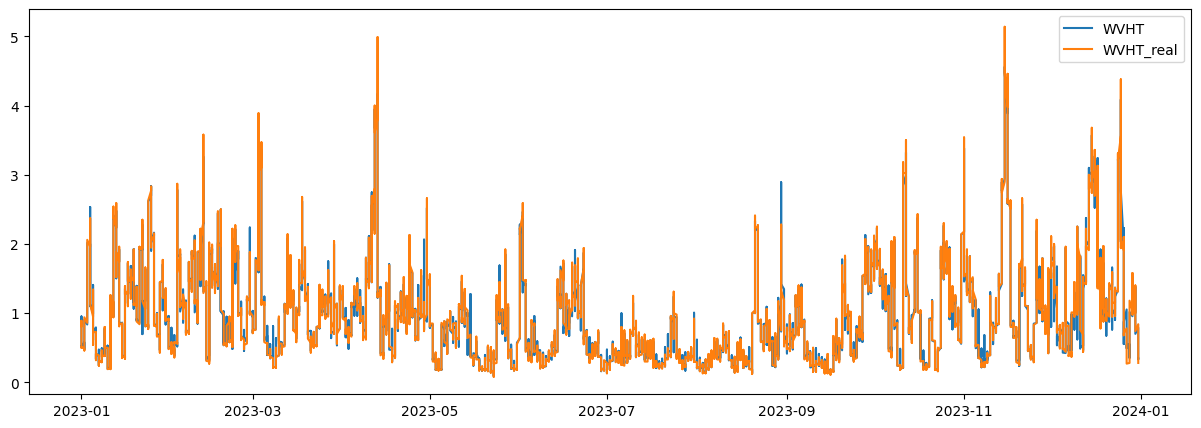

In [ ]:
# Data visualization
# Remove rows in WVHT where values exceed 99
df = df[df['WVHT'] < 99]
X = df.drop(['time','WVHT'], axis=1)
y = df['WVHT']
# Predict WVHT values using the model
y_pred = model.predict(X)

plt.figure(figsize=(15, 5))
plt.plot(df['time'], y_pred, label='WVHT')

plt.plot(df['time'], y, label='WVHT_real')
plt.legend()